In [36]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

test = pd.read_csv('Data/test.csv')
train = pd.read_csv('Data/train.csv')

In [37]:
import seaborn as sns
sns.set(color_codes=True)

In [38]:
test['file'] = 'test'
test['SalePrice'] = np.nan
train['file'] = 'train'

In [39]:
test_names = test.columns
train_names = train.columns

names_match = set(test_names) & set(train_names)

print('Length of columns in test (%s), train (%s) and the number that match between the two (%s)' %(len(test_names), len(train_names), 
                                                                                              len(names_match)))

Length of columns in test (82), train (82) and the number that match between the two (82)


In [40]:
frames = [train, test]

print ('Combining test and train into one long dataset for analysis. Please note that absence of sale price = NaN')
ttl_df = pd.concat(frames)

print ('Test was %s rows long, train was %s and the combined df is %s rows long' % (test.shape[0], train.shape[0], 
                                                                                    ttl_df.shape[0]))

Combining test and train into one long dataset for analysis. Please note that absence of sale price = NaN
Test was 1459 rows long, train was 1460 and the combined df is 2919 rows long


In [95]:
print ('Working on the categorical varaiables. Man this is gonna suck')

s = pd.Series(pd.Categorical(ttl_df['MSSubClass']))

cats = ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER',
        '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES',
        '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER',
        '2-STORY 1945 & OLDER','2-1/2 STORY ALL AGES',
        'SPLIT OR MULTI-LEVEL', 'SPLIT FOYER',
       'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '1-1/2 STORY PUD - ALL AGES', '2-STORY PUD - 1946 & NEWER',
       'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']

s.cat.categories = cats
ttl_df['MSSubClass_cat'] = s

Working on the categorical varaiables. Man this is gonna suck


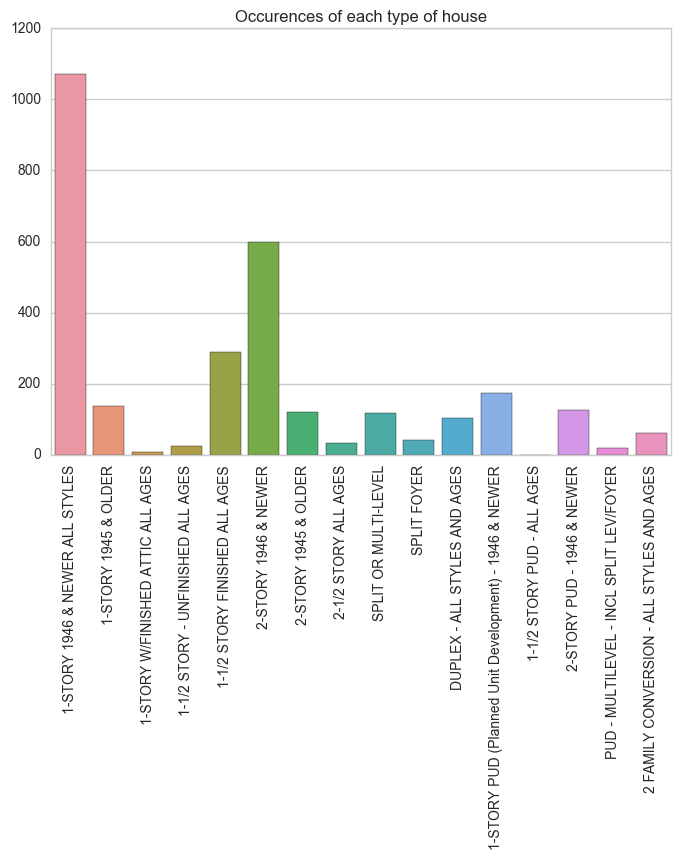

In [116]:
s = pd.value_counts(ttl_df['MSSubClass_cat'].values).to_frame().reset_index()
s.columns = ['house_type', 'count']

title = 'Occurences of each type of house'

sns.set_style("whitegrid")
ax = sns.barplot(y = "count", x = 'house_type', data=s)
ax.set(xlabel = '', ylabel = '', title = title)
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical');